<a href="https://colab.research.google.com/github/EAsencios/DEEP-LEARING/blob/master/fi_imagen_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io


In [4]:
cat = io.imread('/content/drive/MyDrive/Colab Notebooks/cat.jpg')
dog = io.imread('/content/drive/MyDrive/Colab Notebooks/dog.jpg')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])

print(cat.shape, dog.shape)

(603, 910, 3) (1080, 1920, 3)


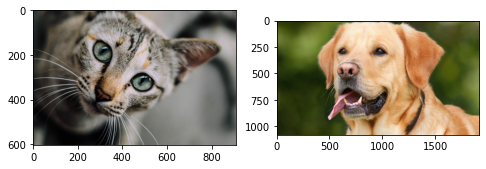

In [9]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dog)

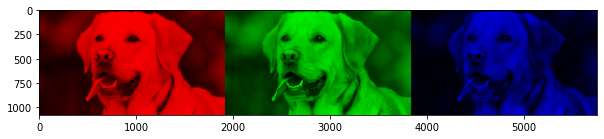

In [10]:
dog_r = dog.copy()                # red channel
dog_r[:,:,1] = dog_r[:,:,2] = 0   # set G, B pixels = 0
dog_g = dog.copy()                # green channel
dog_g[:,:,0] = dog_g[:,:,2] = 0   # set R, B pixels = 0
dog_b = dog.copy()                # blue channel
dog_b[:,:,0] = dog_b[:,:, 1] = 0  # set R, G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize=(10, 4))
plt.imshow(plot_image)

In [11]:
dog_r[:,:,0]

array([[ 51,  49,  47, ..., 142, 141, 140],
       [ 48,  47,  46, ..., 140, 142, 144],
       [ 47,  47,  47, ..., 140, 142, 143],
       ...,
       [ 28,  26,  26, ..., 220, 218, 217],
       [ 31,  28,  28, ..., 220, 218, 218],
       [ 29,  26,  26, ..., 221, 221, 221]], dtype=uint8)

In [14]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image Shape:', cgs.shape, '\n')

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', np.round(cgs.flatten(), 2))

Image Shape: (603, 910) 

2D image pixel map
[[0.21 0.21 0.21 ... 0.37 0.37 0.37]
 [0.21 0.21 0.21 ... 0.37 0.37 0.37]
 [0.21 0.21 0.21 ... 0.37 0.37 0.37]
 ...
 [0.35 0.35 0.36 ... 0.53 0.53 0.53]
 [0.35 0.35 0.37 ... 0.53 0.53 0.53]
 [0.35 0.35 0.37 ... 0.53 0.53 0.53]] 

Flattened pixel map: [0.21 0.21 0.21 ... 0.53 0.53 0.53]


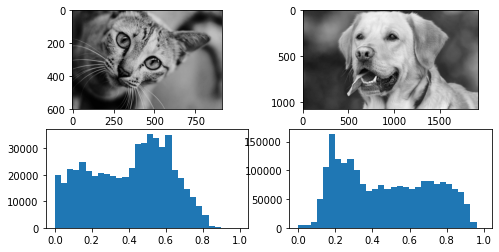

In [18]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap='gray')
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, c_patches = ax4.hist(dgs.flatten(), bins=30)